Text(0.5, 1.0, 'Daily freeCodeCamp Forum Page Views 5/2016-12/2019')

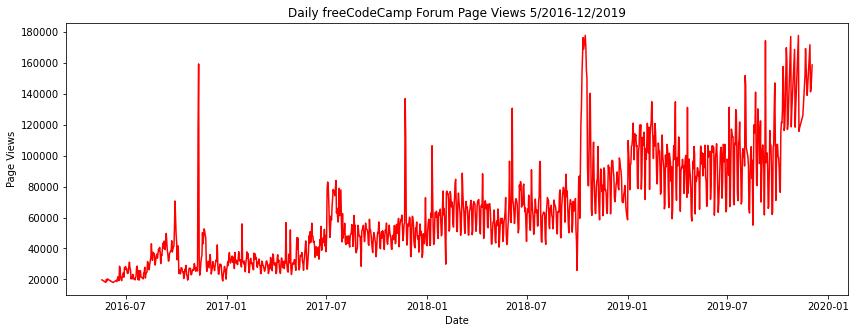

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

df=pd.read_csv("https://raw.githubusercontent.com/justkacz/FreeCodeCampCert/main/fcc-forum-pageviews.csv", index_col=['date'], parse_dates=['date'])
df=df[(df.value>=df.value.quantile(0.025))]
df=df[(df.value<=df.value.quantile(0.975))]

plt.figure(figsize=(14,5))
plt.plot(df, color='red')
plt.xlabel("Date")
plt.ylabel("Page Views")
plt.title("Daily freeCodeCamp Forum Page Views 5/2016-12/2019")

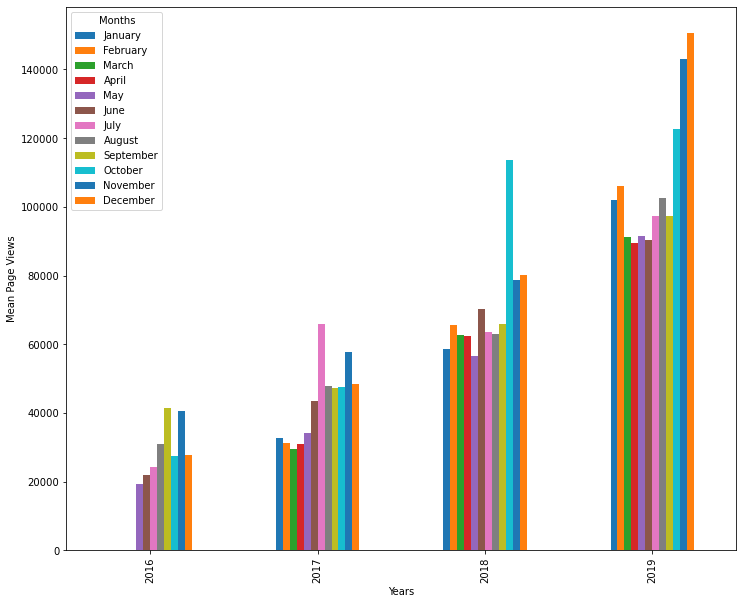

In [29]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from calendar import month_name

df=pd.read_csv("https://raw.githubusercontent.com/justkacz/FreeCodeCampCert/main/fcc-forum-pageviews.csv", index_col=['date'], parse_dates=['date'])
df=df[(df.value>=df.value.quantile(0.025))]
df=df[(df.value<=df.value.quantile(0.975))]

months = month_name[1:]
df['months'] = pd.Categorical(df.index.strftime('%B'), categories=months, ordered=True)
dfp = pd.pivot_table(data=df, index=df.index.year, columns='months', values='value')
fig= dfp.plot(kind='bar', figsize=(12, 10), ylabel='Mean Page Views', xlabel='Years', rot=90)
fig.legend(loc='upper left', title='Months')



Text(0.5, 1.0, 'Month-wise Box Plot (Seasonality)')

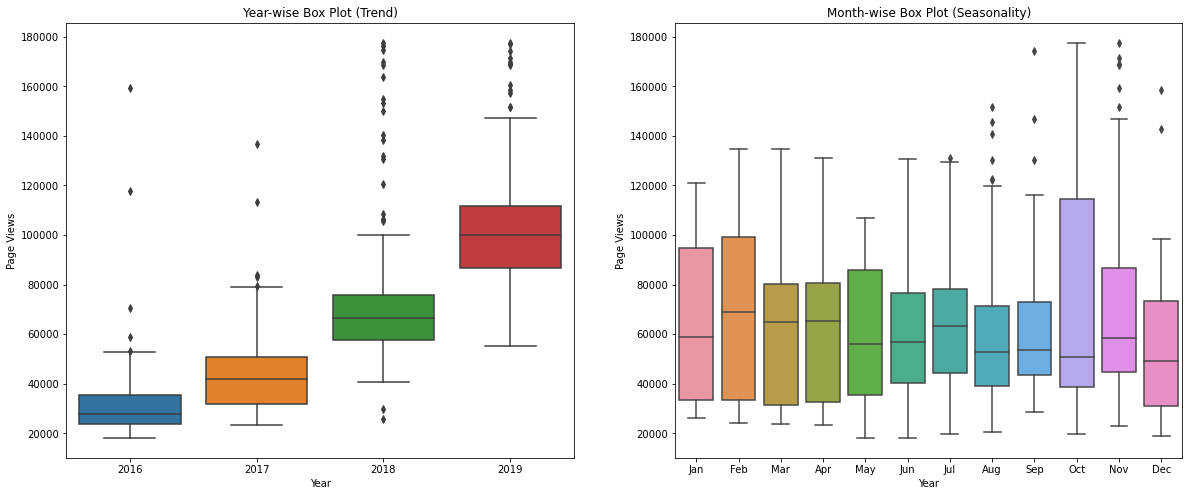

In [70]:
fig, ax = plt.subplots(1, 2, figsize=(20,8))
sns.boxplot(ax=ax[0], x=df.index.year, y=df.value)
ax[0].set_xlabel("Year")
ax[0].set_ylabel("Page Views")
ax[0].set_title("Year-wise Box Plot (Trend)")

sns.boxplot(ax=ax[1], x=df.months, y=df.value)
ax[1].set_xlabel("Year")
ax[1].set_xticklabels(x[:3] for x in months)
ax[1].set_ylabel("Page Views")
ax[1].set_title("Month-wise Box Plot (Seasonality)")